# Quantitative Methods for Finance Coursework

## Introduction:

This coursework will explore key concepts regarding quantitative methods through the use of Python code to implement the mathematics being used in this module. Additionally, a detailed discussion of the code shall be provided, in order to justify the code written and the techniques used to do so. Moreover, any graphs present in this notebook will be labelled correctly. 

## Preliminaires:

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

These statements ensure that the code runs smoothly without any errors, and all the data necessary for the exercises to be loaded before the code for the exercises is written. 
The scipy module is used for scientific and technical computing.
The matplotlib module will ensure that the python code can be used to make graphs for the exercises. 
Additionally, the numpy module is used to code for arrays, and answer the questions related to arrays.

## Exercise 1:

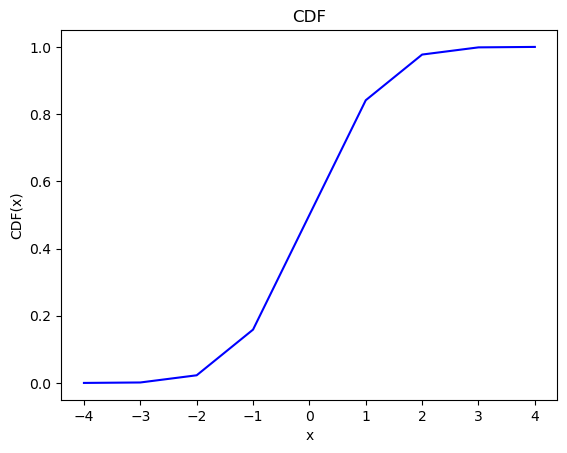

In [404]:
from scipy.stats import norm
def CDF(x): 
    k = 1.0 / (1.0 + 0.2316419 * abs(x)) #substitute the value of k
    n_x = (1.0 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x**2) #compute n_x

    #depict the values of a1 to a5
    a1 = 0.319381530
    a2 = -0.356563782
    a3 = 1.781477937
    a4 = -1.821255978
    a5 = 1.330274429
    
    numerical_scheme = (a1 * k) + (a2 * k**2) + (a3 * k**3) + (a4 * k**4) + (a5 * k**5) #compute the values for the numerical scheme
    N_x = 1.0 - n_x * numerical_scheme #caculate the function N_x

    if x < 0: #add the additional condition
        N_x = 1.0 - N_x

    return N_x

x_values = np.arange(-4, 5) #get values from -4 to 4
cdf_values= np.array([CDF(x) for x in x_values]) #create an array using the cdf function
plt.plot(x_values, cdf_values, color='blue') #plot the cdf values
plt.title('CDF') #provide the title of the graph
plt.xlabel('x') #provide the label of the x-axis
plt.ylabel('CDF(x)') #provide label of the y-axis
plt.show() #show the figures in the graph

This section of code defines a function called CDF in order to compute the CDF of a standard normal variable. Firstly, a variable k is defined according to the value provided in the coursework sheet. Similarly, the value for n_x is depicted, and the values of a1 to a5 are defined. Then, the value of N_x is calculated by using the approximation formula provided. Then, a condition is added to check if x is less than 0, and the accurate formula for that condition is provided. 

Next, values for x are generated from -4 to 4, using the numpy function .arange(), which is used to populate the array with evenly spaced numbers, and return the populated array. Then, a list comprehension is created to loop all the values of x through the CDF function. Later, it is converted into an array using the np.array function in order to calculate the absolute differences between the actual CDF values and the approximate CDF values.

Then, the graph of the CDF of all the values is plotted. The .plot() function is used to plot the array as a graph. Moreover, the .xlabel() function is used to label the x-axis. Similarly, the .ylabel() function is used to label the y-axis of the graph. The .title() function is used to provide a title to describe the graph plotted. Finally, the .show() function is used to display all open figures present in the graph.

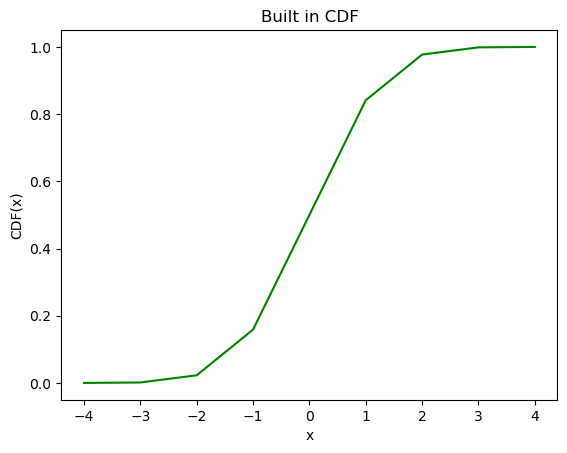

In [406]:
#calculate the built-in cdf values 
accurate_cdf_values = np.array([norm.cdf(x) for x in x_values])#use norm.cdf()
plt.plot(x_values, accurate_cdf_values, color='green') 
plt.title('Built in CDF') 
plt.xlabel('x') 
plt.ylabel('CDF(x)') 
plt.show()

This segment of code calculates the actual cdf values of x from -4 to 4, while using the norm.cdf() function. This is done using a list comprehension in order to loop all the values through the function. Then, the list comprehension is converted into an array. Moreover, the graph is plotted, and its x-axis and y-axis are labelled accurately. Additionally, the title of the graph is provided, to describe the graph. Then, all the open figures are displayed in the graph.

Mean difference: 3.551363763519505e-08
Maximum difference: 6.993392731580172e-08
Minimum difference: 5.248086409892494e-10


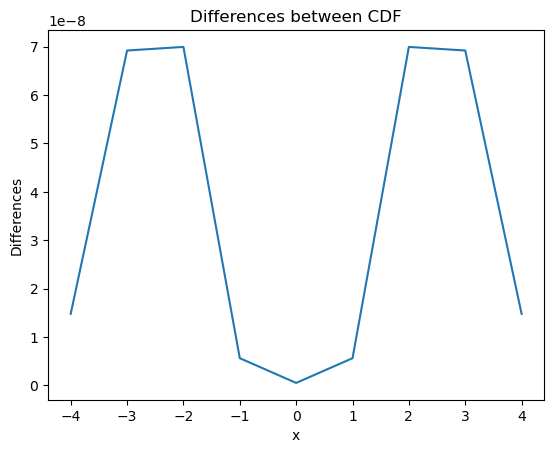

In [296]:
differences = np.abs(accurate_cdf_values - cdf_values) #calculate the difference between the built in function, and the approx function

#calculate the mean, maximum and minimum differences
mean_diff=np.mean(differences) 
max_diff=np.max(differences)
min_diff=np.min(differences)

#print the values of the differences
print(f"Mean difference: {mean_diff}")
print(f"Maximum difference: {max_diff}")
print(f"Minimum difference: {min_diff}")

plt.plot(x_values, differences) #plot the graph of the differences
plt.title("Differences between CDF")
plt.xlabel("x")
plt.ylabel("Differences")
plt.show()

This segment of code calculates the absolute value of the difference betwen the built in cdf function and the approximate cdf function in order to compute the accuracy of the approx function. Then, it computes the mean, maximum and minimum differences between the cdf functions, and prints those values. 

Next, a graph depicting the differences is plotted, its x-axis and y-axis are labelled accurately. Additionally, the title of the graph is provided, to describe the the graph. Then, all the open figures are displayed in the graph.

## Exercise 2:

In [412]:
#allow users to input values for the necessary calculations
def get_inputs(): 
    S0 = float(input("Enter the current stock price: ")) 
    E = float(input("Enter the strike price: ")) 
    T = float(input("Enter the time to expiry in years: ")) 
    sigma = float(input("Enter the volatility in decimal form: ")) 
    r = float(input("Enter the risk-free interest rate in decimal form: ")) 
    D = float(input("Enter the dividend yield: ")) 
    return S0, E, T, sigma, r, D

#european call option pricing using input values
def european_call(S0, E, T, sigma, r, D):
    d1 = (np.log(S0 / E) + (r - D + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))#computes a formula for option pricing
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S0 * np.exp(-D * T) * stats.norm.cdf(d1) - E * np.exp(-r * T) * stats.norm.cdf(d2)#uses built in cdf function
    return call_price

#european put option pricing
def european_put(S0, E, T, sigma, r, D):
    d1 = (np.log(S0 / E) + (r - D + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    put_price = E * np.exp(-r * T) * stats.norm.cdf(-d2) - S0 * np.exp(-D * T) * stats.norm.cdf(-d1)
    return put_price

#binary call option pricing
def binary_call(S0, E, T, sigma, r, D):
    d2 = (np.log(S0 / E) + (r - D - 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    binary_call_price = np.exp(-r * T) * stats.norm.cdf(d2)
    return binary_call_price

#binary put option pricing
def binary_put(S0, E, T, sigma, r, D):
    d2 = (np.log(S0 / E) + (r - D - 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    binary_put_price = np.exp(-r * T) * stats.norm.cdf(-d2)
    return binary_put_price

#get user inputs
S0, E, T, sigma, r, D = get_inputs()

# calculate European call and put prices
call_price = european_call(S0, E, T, sigma, r, D)
put_price = european_put(S0, E, T, sigma, r, D)

#calculate binary call and put prices
binary_call_price = binary_call(S0, E, T, sigma, r, D)
binary_put_price = binary_put(S0, E, T, sigma, r, D)

#display the results
print(f"\nEuropean Call Price: {call_price:.2f}")
print(f"European Put Price: {put_price:.2f}")
print(f"Binary Call Price: {binary_call_price:.2f}")
print(f"Binary Put Price: {binary_put_price:.2f}")

Enter the current stock price:  100
Enter the strike price:  100
Enter the time to expiry in years:  1
Enter the volatility in decimal form:  0.2
Enter the risk-free interest rate in decimal form:  0.05
Enter the dividend yield:  0



European Call Price: 10.45
European Put Price: 5.57
Binary Call Price: 0.53
Binary Put Price: 0.42


This piece of code is used to create an option pricing calculator using the Black-Scholes formula. It prices call and put prices for both Europeans and Binaries, according to the input values provided by the user. 

In order to do so, a function has been created for the users to provide all of their inputs. In this function, the users are asked to provide values for the current stock price, the strike price, the time to expiry, the volatility, the risk free interest rate and the dividend yield. All of these values are converted into floats and saved into the respective variables.

Then, the functions to calculate the calls and puts for the europeans and the binaries are created, wherein the values inputted by the user are used to create a formula for d1 and d2, for the europeans. Similarly a different formula for d2 is calculated for the binaries. Then, the prices are calculated by using the Black Scholes formula and the built in cdf function is used for the values of d1 and d2.

Next, the function to get the inputs is called to allow the users to enter their input for the various values. Later, the functions to calculate the prices are called, with the inputs acting as parameters for the functions. Finally, the prices are printed to be displayed to the user in the format of 2 decimal places to improve readability and understandability.

In [418]:
def perform_experiment():
    S, E, T, sigma, r, D = get_inputs()

    #define ranges for changes
    change_input_values = {
        "S": [round(S + i, 2) for i in (-20, -10, -5, 5, 10, 20)],
        "E": [round(E + i, 2) for i in (-20, -10, -5, 5, 10, 20)],
        "T": [round(T + i, 2) for i in (-0.5, -0.1, 0.1, 0.5, 1, 1.5)],
        "sigma": [round(sigma + i, 2) for i in (-0.15, -0.1, -0.05, 0.05, 0.1, 0.15)],
        "r": [round(r + i, 2) for i in (-0.03, -0.02, -0.01, 0.01, 0.02, 0.03)],
        "D": [round(D + i, 2) for i in (0.01, 0.02, 0.03, 0.04, 0.05, 0.06)]
    }

    #create a dictionary to store values
    changes = {"Baseline": (S, E, T, sigma, r, D)}
   
    #populate the dictionary with changed values
    for input_value, change_values in change_input_values.items():
        for delta in change_values:
            modified_input_values = {"S": S, "E": E, "T": T, "sigma": sigma, "r": r, "D": D}
            modified_input_values[input_value] = delta
            changes[f"Change {input_value} to {delta:.2f}"] = (
                modified_input_values["S"],
                modified_input_values["E"],
                modified_input_values["T"],
                modified_input_values["sigma"],
                modified_input_values["r"],
                modified_input_values["D"],
            )

    #calculate results
    results = []
    for change_name, input_values in changes.items():
        S, E, T, sigma, r, D = input_values
        call_price = european_call(S, E, T, sigma, r, D)
        put_price  = european_put(S, E, T, sigma, r, D)
        results.append((change_name, call_price, put_price))

    return results


#run the function to make the changes
results = perform_experiment()

#print the results in a table format
print(f"\n{'Change':<30}{'Call Price':<15}{'Put Price':<15}")
for result in results:
    print(f"{result[0]:<30}{result[1]:<15.2f}{result[2]:<15.2f}")

Enter the current stock price:  100
Enter the strike price:  100
Enter the time to expiry in years:  1
Enter the volatility in decimal form:  0.2
Enter the risk-free interest rate in decimal form:  0.05
Enter the dividend yield:  0



Change                        Call Price     Put Price      
Baseline                      10.45          5.57           
Change S to 80.00             1.86           16.98          
Change S to 90.00             5.09           10.21          
Change S to 95.00             7.51           7.63           
Change S to 105.00            13.86          3.98           
Change S to 110.00            17.66          2.79           
Change S to 120.00            26.17          1.29           
Change E to 80.00             24.59          0.69           
Change E to 90.00             16.70          2.31           
Change E to 95.00             13.35          3.71           
Change E to 105.00            8.02           7.90           
Change E to 110.00            6.04           10.68          
Change E to 120.00            3.25           17.40          
Change T to 0.50              6.89           4.42           
Change T to 0.90              9.80           5.40           
Change T to 1.10       

This section of code creates a function in order to change the input values slightly to observe the effects on the option prices. 

To do so, it calls all the values from the function to get user input. Then, a dictionary is set up where each key represents a parameter, and each value is a list of values obtained by chnaging values from the baseline parameter. Then it creates another dictionary which has a single key, representing the default parameter values. Then, a nested for loop is used to perform the changes in values. The outer loop iterates over each parameter and its list of change in values. The inner loop goes over each specific change in values. A dictionary is created to hold the baseline values, and the relevant parameter is updated to the current change in value. Then, a descriptive key is generated to suggest the changes made to the values. The corresponding tuple of modified parameters is stored in the dictionary. Next, each key-value pair in the dictionary is processed based on the values entered and the functions for calls and puts. 

Finally, a formatted header with column labels is printed. It iterates through the results list and prints each row: the description of the particular value changed, the call price formatted to 2 decimal places, amd the put price formatted to 2 decimal places. The length of the change description is 30 characters, while the length of the prices is 15 characters.

The call and put prices of an option is influenced by multiple factors such as stock price, strike price, time to expiry, volatility, risk free interest rate and dividends. 

For the stock price, call options gain value as the stock price rises, while put options lose value, and vice versa when the stock price falls. 
The strike price impacts option prices oppositely, as calls become more valuable with lower value of E, while puts gain value with higher value of E.

A lower strike price makes the call more valuable because it allows the stock to be purchased at a cheaper price. A higher strike price reduces the call value, as the cost to purchase the stock increases. A higher strike price increases the put value, as it allows the stock to be sold at a higher price. A lower strike price reduces the put's value because the selling price decreases.

Higher volatility increases the likelihood of extreme price changes in either direction. This increases the possibility for increasing the value of both calls and puts. Lower volatility reduces the chances of significant price movements, thus reducing the value of both calls and puts. 

Longer time to expiry increases the likelihood the stock price will rise above the strike price, so call prices increase. Longer time to expiry increases the possibility of the stock price falling below the strike price, but this effect is weaker due to time decay. 

Higher interest rates reduce the value of the strike price for calls, so call prices rise. Higher interest rates reduce the value of puts as it becomes expensive to short the stock. Lower interest rates increase the value of the strike price for calls, so call prices fall. Lower interest rates increase the value of puts as it becomes less costly to short the stock.

Finally, call prices fall as dividends increase. Dividends lower the stock price, increasing the likelihood of the stock price falling below the strike price. Hence, put prices increase with higher dividends.

## Exercise 3:

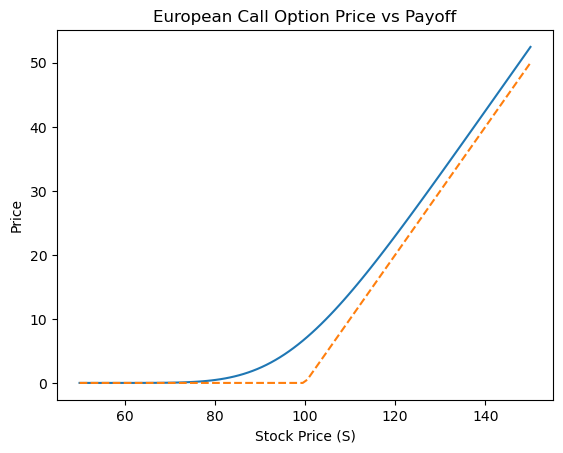

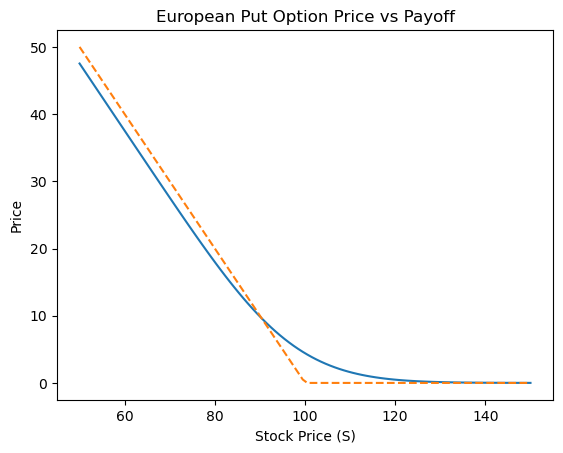

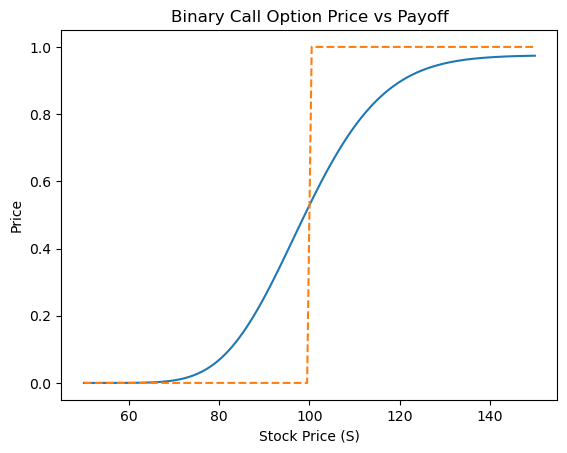

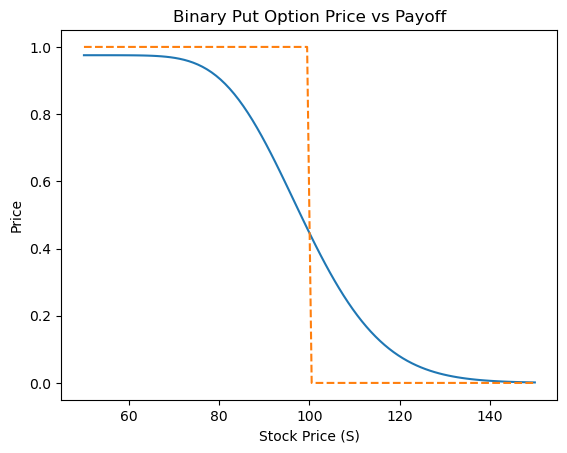

In [386]:
def plot_prices(t):
    S = np.linspace(50, 150, 100)  #get varying stock prices
    #set the value for the other variables
    E = 100  
    T=1
    sigma=0.2
    r=0.05
    D=0
    
    #calculate option prices using the values entered
    european_calls = [european_call(s, E, T-t, sigma, r, D) for s in S]
    european_puts = [european_put(s, E, T-t, sigma, r, D) for s in S]
    binary_calls = [binary_call(s, E, T-t, sigma, r, D) for s in S]
    binary_puts = [binary_put(s, E, T-t, sigma, r, D) for s in S]

    #compute the payoff functions for each option
    call_payoff = np.maximum(S - E, 0)
    put_payoff = np.maximum(E - S, 0)
    binary_call_payoff = np.where(S > E, 1, 0)
    binary_put_payoff = np.where(S < E, 1, 0)

    #plot european call option
    plt.plot(S, european_calls, label="European Call Price")
    plt.plot(S, call_payoff, label="Call Payoff", linestyle="--")
    plt.title("European Call Option Price vs Payoff")
    plt.xlabel("Stock Price (S)")
    plt.ylabel("Price")
    plt.show()

    #plot european put option
    plt.plot(S, european_puts, label="European Put Price")
    plt.plot(S, put_payoff, label="Put Payoff", linestyle="--")
    plt.title("European Put Option Price vs Payoff")
    plt.xlabel("Stock Price (S)")
    plt.ylabel("Price")
    plt.show()

    #plot binary call option
    plt.plot(S, binary_calls, label="Binary Call Price")
    plt.plot(S, binary_call_payoff, label="Binary Call Payoff", linestyle="--")
    plt.title("Binary Call Option Price vs Payoff")
    plt.xlabel("Stock Price (S)")
    plt.ylabel("Price")
    plt.show()

    #plot binary put option
    plt.plot(S, binary_puts, label="Binary Put Price")
    plt.plot(S, binary_put_payoff, label="Binary Put Payoff", linestyle="--")
    plt.title("Binary Put Option Price vs Payoff")
    plt.xlabel("Stock Price (S)")
    plt.ylabel("Price")
    plt.show()

plot_prices(t=0.5)

This section of code is used to plot the option price V (S) against varying stock S, and s includes the payoff function for the options. 

This is done by creating a function that plots the option prices by varying the values of the stock, and keeping the rest of the values constant, in order to track how the option price changes with the stock. This function takes the parameter t, where t<T. the stock prices are defined using the function np.linspace(), to return evenly spaced numbers over an interval. Next, the option prices are plotted against their payoffs for the calls and puts for both Europeans and binaries. All of them are provided a title, and their x-axis and y-axis are labelled in order to improve readability and understandability. 

Then, this function is called with the parameter t set to 0.5 in order to plot all the graphs according to the value provided.

For the plot of European call option price vs payoff, when the stock price is less than the strike price the option expires worthless. When S > E, the payoff increases linearly. The price curve is smoother and lies above the payoff curve because it includes the time value of the option and the risk-adjusted probabilities in pricing. This graph helps in understanding how the call option price changes with variation in S.

For the plot of European put option price vs payoff, when the stock price is greater than the strike price, the put option expires worthless.
When S < E, the payoff increases linearly. The price curve is smoother because it incorporates the time value of the option and the probability of S falling below E before expiration. This graph demonstrates how the value of a put option increases as the underlying stock price falls.

For the plot of Binary call option price vs payoff, the payoff is 1 if S > E, and 0 otherwise. The price curve is smoother because it reflects the probability that S > E is possible at expiration.

For the plot of Binary put option price vs payoff, the payoff is 1 if S < E, and 0 otherwise. The price curve is smoother, reflecting the probability that S < E occurs at expiration. 
‌